# Wide vs. Long Format Data

## About the data
In this notebook, we will be using daily temperature data from the [National Centers for Environmental Information (NCEI) API](https://www.ncdc.noaa.gov/cdo-web/webservices/v2). We will use the Global Historical Climatology Network - Daily (GHCND) dataset for the Boonton 1 station (GHCND:USC00280907); see the documentation [here](https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf).

*Note: The NCEI is part of the National Oceanic and Atmospheric Administration (NOAA) and, as you can see from the URL for the API, this resource was created when the NCEI was called the NCDC. Should the URL for this resource change in the future, you can search for "NCEI weather API" to find the updated one.*

## Setup

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

wide_df = pd.read_csv('data/wide_data.csv', parse_dates=['date'])
long_df = pd.read_csv(
    'data/long_data.csv', 
    usecols=['date', 'datatype', 'value'], 
    parse_dates=['date']
)[['date', 'datatype', 'value']] # sort columns

## Wide format
Our variables each have their own column:

In [3]:
wide_df.head(6)

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9
5,2018-10-06,20.0,13.3,16.1


Describing all the columns is easy:

In [4]:
wide_df.describe(include='all', datetime_is_numeric=True)

,date,TMAX,TMIN,TOBS
count,31,31.000000,31.000000,31.000000
mean,2018-10-16 00:00:00,16.829032,7.561290,10.022581
min,2018-10-01 00:00:00,7.800000,-1.100000,-1.100000
25%,2018-10-08 12:00:00,12.750000,2.500000,5.550000
50%,2018-10-16 00:00:00,16.100000,6.700000,8.300000
75%,2018-10-23 12:00:00,21.950000,13.600000,16.100000
max,2018-10-31 00:00:00,26.700000,17.800000,21.700000
std,NaN,5.714962,6.513252,6.596550


It's easy to graph with `pandas` (covered in chapter 5):

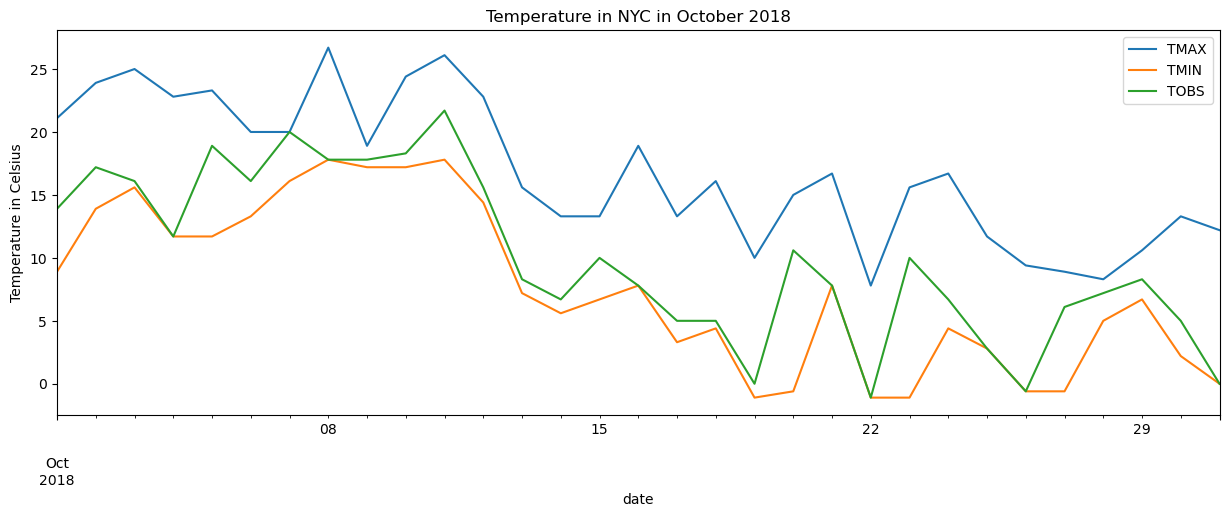

In [5]:
wide_df.plot(
    x='date', y=['TMAX', 'TMIN', 'TOBS'], figsize=(15, 5), 
    title='Temperature in NYC in October 2018'
).set_ylabel('Temperature in Celsius')
plt.show()

## Long format
Our variable names are now in the `datatype` column and their values are in the `value` column. We now have 3 rows for each date, since we have 3 different `datatypes`:

In [6]:
long_df.head(6)

,date,datatype,value
0,2018-10-01,TMAX,21.1
1,2018-10-01,TMIN,8.9
2,2018-10-01,TOBS,13.9
3,2018-10-02,TMAX,23.9
4,2018-10-02,TMIN,13.9
5,2018-10-02,TOBS,17.2


Since we have many rows for the same date, using `describe()` is not that helpful:

In [7]:
long_df.describe(include='all', datetime_is_numeric=True)

,date,datatype,value
count,93,93,93.000000
unique,NaN,3,NaN
top,NaN,TMAX,NaN
freq,NaN,31,NaN
mean,2018-10-16 00:00:00,NaN,11.470968
min,2018-10-01 00:00:00,NaN,-1.100000
25%,2018-10-08 00:00:00,NaN,6.700000
50%,2018-10-16 00:00:00,NaN,11.700000
75%,2018-10-24 00:00:00,NaN,17.200000
max,2018-10-31 00:00:00,NaN,26.700000


Plotting long format data in `pandas` can be rather tricky. Instead we use `seaborn` (covered in [`ch_06/1-introduction_to_seaborn.ipynb`](../ch_06/1-introduction_to_seaborn.ipynb)):

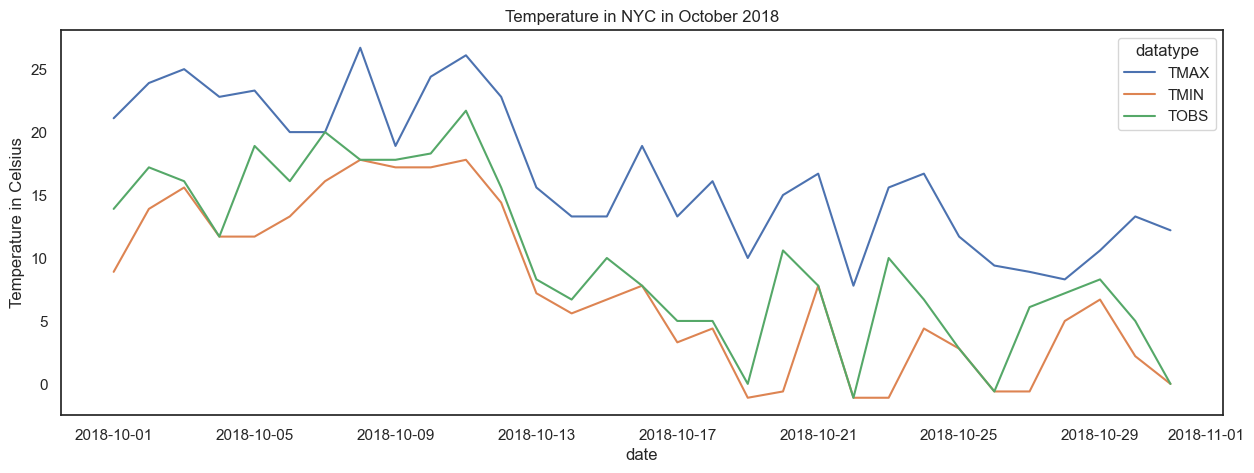

In [8]:
import seaborn as sns

sns.set(rc={'figure.figsize': (15, 5)}, style='white')

ax = sns.lineplot(
    data=long_df, x='date', y='value', hue='datatype'
)
ax.set_ylabel('Temperature in Celsius')
ax.set_title('Temperature in NYC in October 2018')
plt.show()

With long data and `seaborn`, we can easily facet our plots:

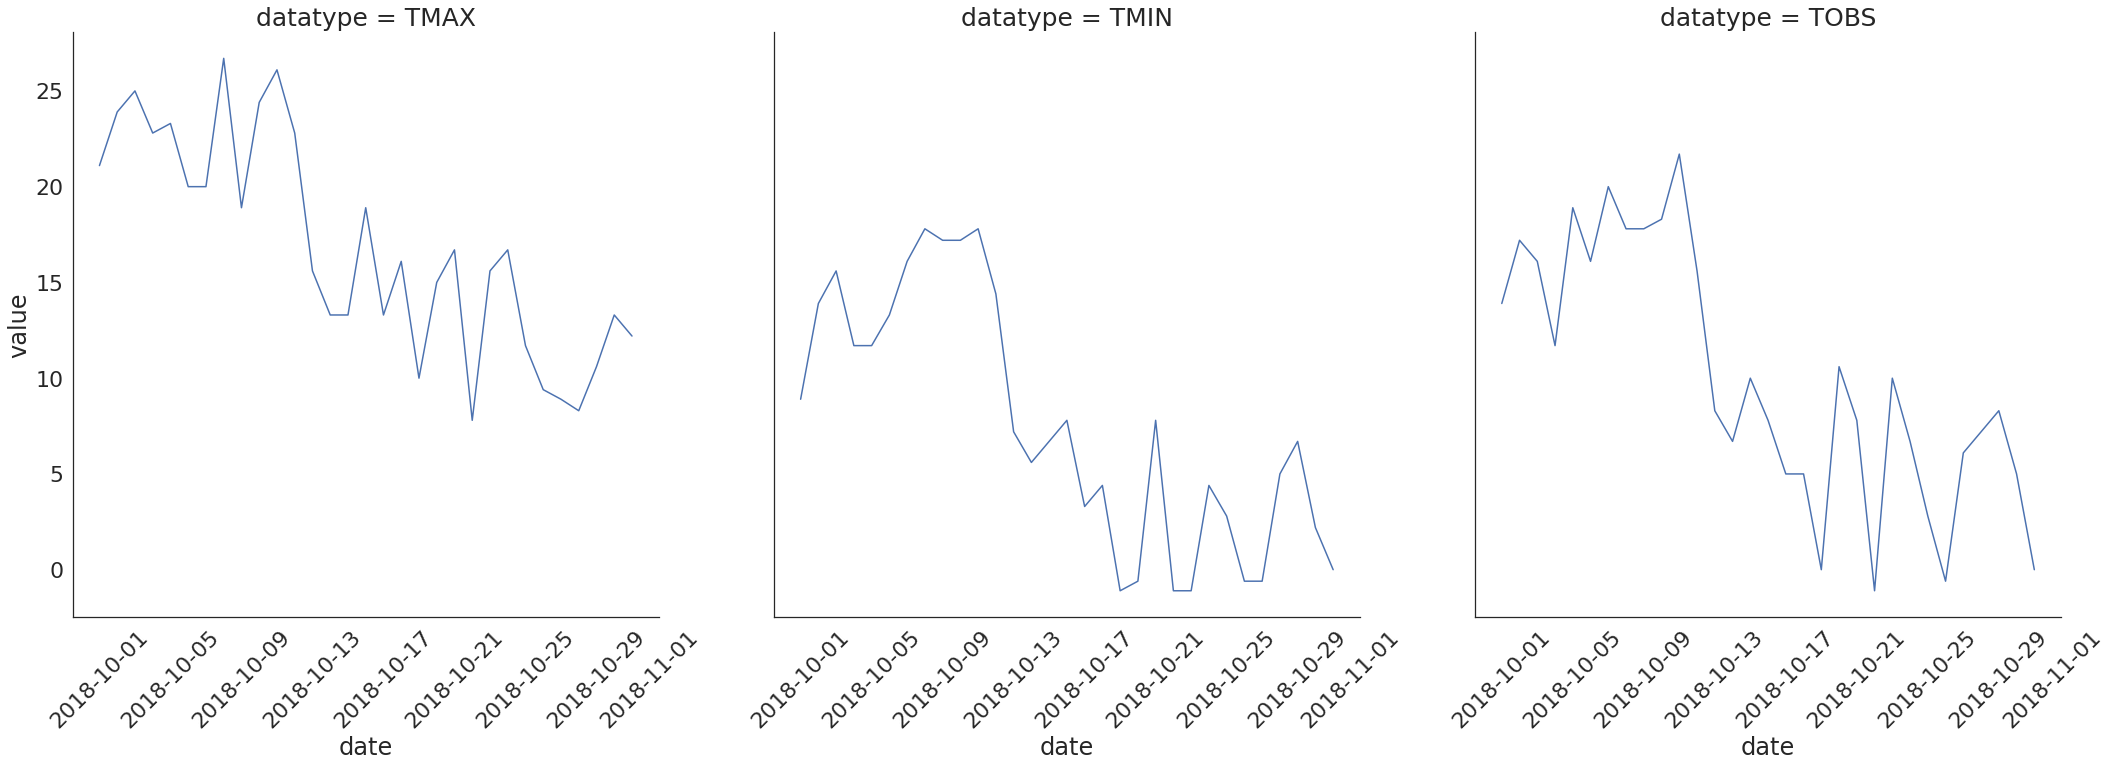

In [8]:
sns.set(
    rc={'figure.figsize': (20, 10)}, style='white', font_scale=2
)

g = sns.FacetGrid(long_df, col='datatype', height=10)
g = g.map(plt.plot, 'date', 'value')
g.set_titles(size=25)
g.set_xticklabels(rotation=45)
plt.show()

<hr>
<div>
    <a href="../ch_02/6-adding_and_removing_data.ipynb">
        <button style="float: left;">&#8592; Chapter 2</button>
    </a>
    <a href="./2-using_the_weather_api.ipynb">
        <button style="float: right;">Next Notebook &#8594;</button>
    </a>
</div>
<br>
<hr>